In [2]:
import numpy as np
import pandas as pd
from scipy import stats

**Example-1:**

A principal at a certain school claims that the students in his school are above average intelligence. 
A random sample of thirty students IQ scores have a mean score of 112.5. Is there sufficient evidence to support the principal’s claim? The mean population IQ is 100 with a standard deviation of 15.

H1 : The students in the school are having above average ($\mu > 100$)

H0 : The students in the school are having below average ($\mu \le 100$)

In [2]:
n = 30
sample_mean = 112.5
pop_mean = 100
pop_std = 15

# $t = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt(n-1)}}$

In [3]:
def t_score(n, pop_mean,pop_std,sample_mean):
    numerator = sample_mean - pop_mean
    denominator = pop_std / np.sqrt(n -1)
    return numerator/denominator


In [5]:
cal = t_score(n, pop_mean,pop_std,sample_mean)
cal

4.487637339278753

p_val = 1 - cdf(cal)

In [11]:
p_val = 1 - stats.t.cdf(cal,n-1)
p_val

5.253158558449211e-05

In [12]:
p_val = 0.000053

In [13]:
if p_val <= 0.05:
    print('Reject Ho : The students in the school are having above average ( 𝜇>100 )')
else:
    print('Failed to Reject H0 : The students in the school are having below average ( 𝜇≤100 )')

Reject Ho : The students in the school are having above average ( 𝜇>100 )


**Example-2:**

Blood glucose levels for obese patients have a mean of 100 with a standard deviation of 15. 
A researcher thinks that a diet high in raw cornstarch will have a positive or negative effect 
on blood glucose levels. A sample of 30 patients who have tried the raw cornstarch diet have a 
mean glucose level of 140. Test the hypothesis that the raw cornstarch had an effect. 

In order to investigate the relationship between mean job tenure in years among workers who have a bachelor’s degree or higher and those who do not, random samples of each type of worker were taken, with the following results.
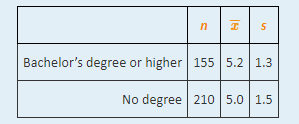

Test, at the 1% level of significance, the claim that mean job tenure among those with higher education is greater than among those without, against the default that there is no difference in the means.

- H0: Both means are not equal
- H1: Both means are equal

In [14]:
n1 = 155
n2 = 210

mean1 = 5.2
mean2 = 5.0

std1 = 1.3
std2 = 1.5

se1 = std1**2/n1
se2 = std2**2/n2

numerator = mean1 - mean2
denominator = np.sqrt(se1 + se2)

z_cal = numerator/denominator
z_cal

1.3602763459567448

In [17]:
p_val = 2*(1 - stats.norm.cdf(z_cal))
p_val

0.17374249076417936

In [20]:
if p_val <= 0.05:
    print('Reject Ho : ')
else:
    print('Failed to Reject H0 : ')

Failed to Reject H0 : 


## Chi_Sqrare Test

In [21]:
import seaborn as sns

In [23]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [61]:
ct = pd.crosstab(tips['time'],tips['sex'])
ct

sex,Male,Female
time,,
Lunch,33,35
Dinner,124,52


In [68]:
p_val,stats.chi2_contingency(ct)

(0.17374249076417936,
 (9.343808982970623,
  0.002237400118075248,
  1,
  array([[ 43.75409836,  24.24590164],
         [113.24590164,  62.75409836]])))

In [57]:
stat, p, dof, expected = stats.chi2_contingency(ct)
#-----------interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    
    print('Dependent (reject H0)')
    
else:
    print('Independent (H0 holds true)')

p value is 0.8026198364134443
Independent (H0 holds true)


In [71]:
def chi_test(data,col1,col2):
    ct = pd.crosstab(data[col1],data[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    #-----------interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:

        print('{} and {} both are Dependent (reject H0)'.format(col1,col2))

    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))


In [75]:
for i in tips.columns:
    
    print(chi_test(tips,'sex',i))

p value is 0.44679150641050713
sex and total_bill both are Independent (H0 holds true)
None
p value is 0.5825731193437198
sex and tip both are Independent (H0 holds true)
None
p value is 4.6631801073580334e-54
sex and sex both are Dependent (reject H0)
None
p value is 1.0
sex and smoker both are Independent (H0 holds true)
None
p value is 0.004180302092822257
sex and day both are Dependent (reject H0)
None
p value is 0.002237400118075248
sex and time both are Dependent (reject H0)
None
p value is 0.3217222375571469
sex and size both are Independent (H0 holds true)
None


## Confidence Interval
statistics (z-score) is used when the data follows a normal distribution, population standard deviation is known and the sample size is above 30. ZScore tells you how many standard deviations from the mean the result is.

t-statistics (t-score), also known as Student's T-Distribution, is used when the data follows a normal distribution, population standard deviation ( σ ) is
NOT known, but the sample standard deviation ( s ) is known or can be calculated, and the sample size is below 30. T-Score tells you how many
standard deviations from the mean the result is.

z-critical = stats.norm.ppf(1 - alpha)

t-critical = stats.t.ppf(alpha/numOfTails, ddof)

**1) A sample of 20 items is selected randomly from a very large shipment. It is found to have a mean weight
of 310 gm and standard deviation equal to 9 gm. Derive the 95% and 99% confidence intervals for
population mean weight.**


In [1]:
from scipy import stats

In [6]:
sample_mean = 310
sample_std = 9
n = 200
alpha = 0.05

In [7]:
stats.t.interval(0.05,n-1,sample_mean,sample_std) # 95% confidence

(309.4349267624938, 310.5650732375062)

In [5]:
stats.t.interval(0.01,n-1,sample_mean,sample_std) # 99% confidence

(309.8857051906286, 310.1142948092659)

**2) 10 bars of a certain quality are tested for their diameters. The results are given below. Construct a 95%
confidence interval of the mean diameters of the bars produced by the process.**

**diameter(in cm) : 1.02, 0.98, 0.97, 1.01, 0.94, 0.98, 1.00, 1.03, 0.92,1.02**

In [8]:
import numpy as np
diameter = np.array([1.02, 0.98, 0.97, 1.01, 0.94, 0.98, 1.00, 1.03, 0.92,1.02])
diameter

array([1.02, 0.98, 0.97, 1.01, 0.94, 0.98, 1.  , 1.03, 0.92, 1.02])

In [9]:
sample_mean = diameter.mean()
sample_std = diameter.std()
n = len(diameter)
alpha = 0.05

In [10]:
stats.t.interval(alpha,n-1,sample_mean,sample_std) # 95% confidence

(0.9847842112281648, 0.9892157887718349)

In [11]:
stats.t.interval(0.01,n-1,sample_mean,sample_std) # 95% confidence

(0.9865571695164822, 0.9874428304835176)

In [4]:
n=20
std_dev = 9
std_error = std_dev/np.sqrt(n)
std_error


2.0124611797498106

In [5]:
#scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

stats.t.interval(.95, n-1, 310, std_error) #95% confidence interval


(305.7878703422208, 314.2121296577792)

In [6]:
stats.t.interval(.99,n-1,310,std_error) #99% Confidence interval

(304.24248016671675, 315.75751983328325)

**95% confidence interval : (305.7878703422208, 314.2121296577792)**

**99% Confidence interval : (304.24248016671675, 315.75751983328325)**


**2) 10 bars of a certain quality are tested for their diameters. The results are given below. Construct a 95
confidence interval of the mean diameters of the bars produced by the process.**

**diameter(in cm) : 1.02, 0.98, 0.97, 1.01, 0.94, 0.98, 1.00, 1.03, 0.92,1.02**